Average = 39.706039


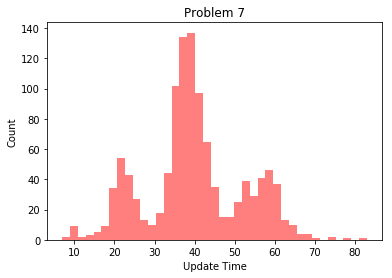

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
'''
Please initialize your algorithm with w = 0 and take sign(0) as −1. As a friendly reminder, remember to add x0 = 1 as always!
'''
def sign(s):
    if s > 0:
        return 1
    else:
        return -1

def shuffle(X,Y,seed):
    #依造種子隨機打亂資料順序
    randomize = np.arange(len(X))
    np.random.seed(seed)
    np.random.shuffle(randomize)
    return (X[randomize], Y[randomize])

def PLA(x_train,y_train):
    update=0
    w=np.zeros(5)
    while(1):
        flag=0
        for t in range(len(x_train)):
            s=sign(w.dot(x_train[t]))
            if s != int(y_train[t]):
                w = w + int(y_train[t])*x_train[t]
                update+=1
                flag=1
        if flag==0:
            break
    return update

data = np.loadtxt(os.path.join('Data', 'hw1_7_train.txt'))
x_train=[]
y_train=[]
for i in range(len(data)):
    x_train.append([data[i][0],data[i][1],data[i][2],data[i][3]])
    y_train.append(data[i][4])
x_train=np.array(x_train)
y_train=np.array(y_train)

'''add x0=1'''
x_train = np.concatenate((np.ones((len(x_train),1)),x_train),axis=1)
count=[]
average_count=0
for i in range(1126):
    x_train,y_train = shuffle(x_train,y_train,i)
    update=PLA(x_train,y_train)
    average_count  += update
    count.append(update)
print('Average = %f' %(average_count/1126))
plt.hist(count,bins=39,facecolor='red', alpha=0.5)
plt.xlabel('Update Time')
plt.ylabel('Count')
plt.title('Problem 7')
plt.savefig('PLA average')
plt.show()